In [ ]:
import json

with open("dataset/result.json", "r") as f:
	data = json.load(f)

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer("all-MiniLM-L6-v2")

In [3]:
embeddings = []
labels = []

for politician in data["politicians"]:
	pro_stances = data["politicians"][politician]["stances"].get("Voted consistently for")
	if not pro_stances is None:
		embedding = model.encode(pro_stances)
		embedding = np.mean(embedding, axis=0)

		embeddings.append(embedding)

		labels.append(data["politicians"][politician]["party"].split(" Representative")[0].split(" Senator")[0])

print(f"Loading {len(labels)} politicians")

Loading 226 politicians


In [4]:
#from sklearn.manifold import TSNE
#embeddings = np.array(embeddings)
#embeddings = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(embeddings)

from sklearn.decomposition import PCA
embeddings = embeddings = np.array(embeddings)
embeddings = PCA(n_components=2).fit_transform(embeddings)

In [ ]:
cluster_embeddings = {}
for idx, party in enumerate(labels):
	cluster_embeddings.setdefault(party, [])
	cluster_embeddings[party].append(embeddings[idx])

clusters = {}
for party in cluster_embeddings:
	party_embedding = np.array(cluster_embeddings[party])
	size = np.mean(np.std(party_embedding, axis=0))
	if size > 0.01 or len(cluster_embeddings[party]) > 5:
		clusters[party] = {
			"mean": np.mean(party_embedding, axis=0),
			"std": size
		}


In [22]:
print(clusters)

{'Australian Labor Party': {'mean': array([0.050813  , 0.04284481], dtype=float32), 'std': np.float32(0.017676007)}, 'Australian Greens': {'mean': array([0.0475765 , 0.06543544], dtype=float32), 'std': np.float32(0.022235801)}, 'Liberal Party': {'mean': array([-0.05634008, -0.06410065], dtype=float32), 'std': np.float32(0.10891123)}, 'Liberal National Party': {'mean': array([-0.17290789, -0.09122214], dtype=float32), 'std': np.float32(0.15733013)}, 'National Party': {'mean': array([-0.05228598, -0.09354784], dtype=float32), 'std': np.float32(0.061327174)}, 'Independent': {'mean': array([0.01779429, 0.03927075], dtype=float32), 'std': np.float32(0.043797884)}, "Pauline Hanson's One Nation Party": {'mean': array([ 0.00899722, -0.05350124], dtype=float32), 'std': np.float32(0.011708566)}}


/tmp/ipykernel_145793/3736729837.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(clusters[party]["mean"][0], clusters[party]["mean"][1], s=clusters[party]["std"] * 1000000, alpha=0.2, c=cmap(label_to_color[party] / len(unique_labels)))#, label=party)


<Figure size 640x480 with 0 Axes>

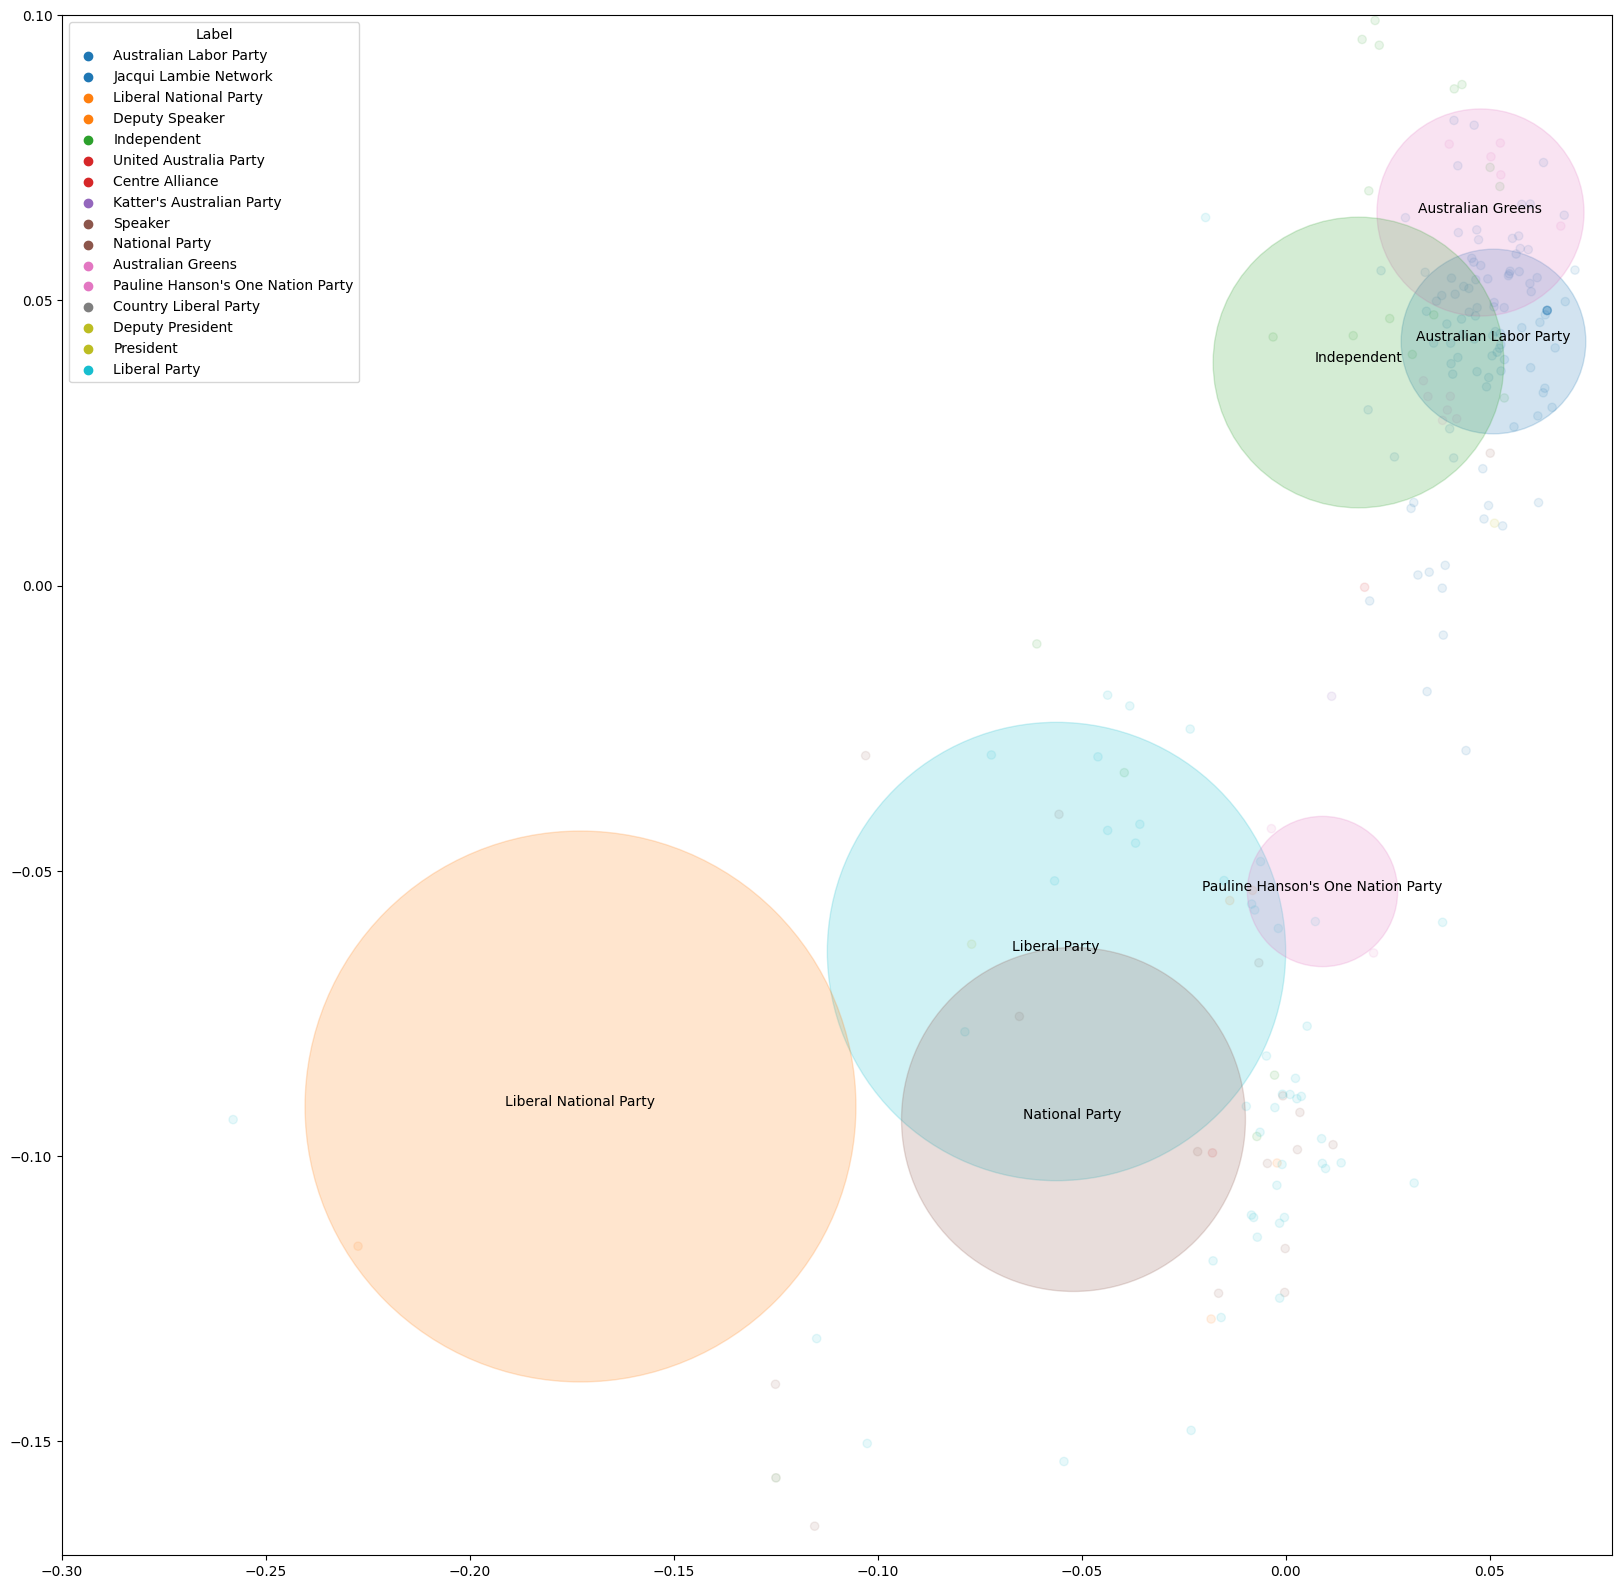

In [ ]:
import matplotlib.pyplot as plt

plt.cla()
plt.clf()

plt.figure(figsize=(20, 20))

unique_labels = list(set(labels))
label_to_color = {label: i for i, label in enumerate(unique_labels)}
colors = [label_to_color[label] for label in labels]
cmap = plt.get_cmap('tab10')
c = [cmap(c / len(unique_labels)) for c in colors]

plt.scatter([i[0] for i in embeddings], [i[1] for i in embeddings], c=c, alpha=0.1)

for party in clusters:
	plt.scatter(clusters[party]["mean"][0], clusters[party]["mean"][1], s=clusters[party]["std"] * 1000000, alpha=0.2, c=cmap(label_to_color[party] / len(unique_labels)))#, label=party)
	plt.annotate(party, (clusters[party]["mean"][0], clusters[party]["mean"][1]), ha='center')

plt.xlim(-0.3, 0.08)
plt.ylim(-0.17, 0.1)

for label in unique_labels:
    i = labels.index(label)  # get first occurrence for legend
    plt.scatter([], [], color=cmap(label_to_color[label] / len(unique_labels)), label=label)


plt.legend(title='Label')
plt.show()